In [19]:

import os
import sys
import sklearn
# lib = r'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
# lib2 = r'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
# lib3 = r'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
# lib4 = r'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
# sys.path.append(lib)
# sys.path.append(lib2)
# sys.path.append(lib3)
# sys.path.append(lib4)
from droplet_dataset import *
from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure

In [20]:
import sys
# lib = r'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
# lib2 = r'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
# lib3 = r'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
# sys.path.append(lib)
# sys.path.append(lib2)
# sys.path.append(lib3)
# sys.path

In [21]:
import sklearn
sklearn.__version__
%matplotlib notebook

# The portion of mitochondria reads from all the reads

count shape (4055, 20765)
number of cells 4055
number of genes 20765


<IPython.core.display.Javascript object>


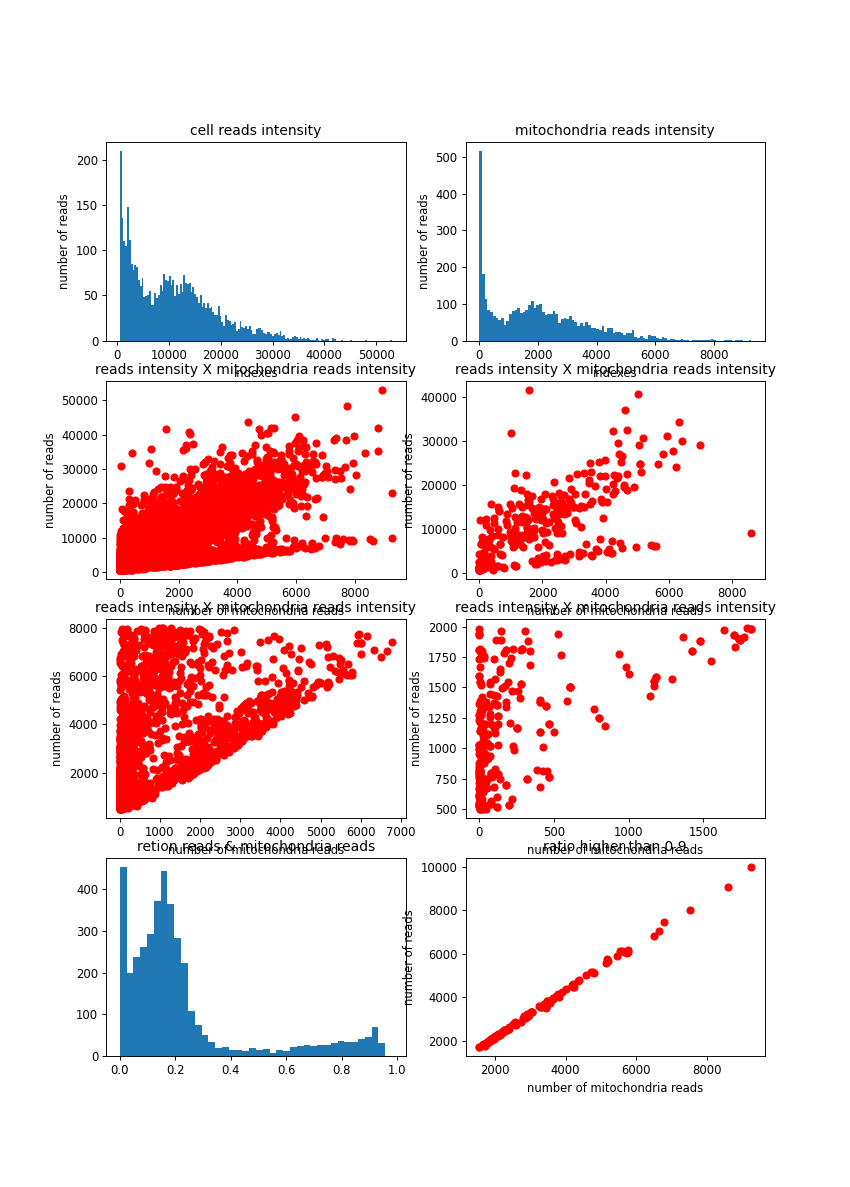

num of mitochondria genes 13
mitochondria genes ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']
pearson correlation  (0.6731912096686005, 0.0)
counting_reads shape  (4055,)
mitochondria_genes shape  (4055,)
number of cells which their mitochondria genes account more than 90.0% : 119
the portion of cells we would drop: 2.935%


In [35]:
# figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')

sample_id = 'M100'
sample = fr'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\Data\rna_seq200k\all_samples\{sample_id}\RNA_sample.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts.T
print(f'count shape {counts.shape}')
print(f'number of cells {counts.shape[0]}')
print(f'number of genes {counts.shape[1]}')

fig, axs = plt.subplots(4, 2)
# fig.set_size_inches(16.5, 14.5)


counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)
mit = [s for s in genes if s.startswith('MT-')]
print(f'num of mitochondria genes {len(mit)}')
print(f'mitochondria genes {mit}')
print(f'pearson correlation  {pearsonr(counting_reads, mitochondria_genes)}')
print(f'counting_reads shape  {counting_reads.shape}')
print(f'mitochondria_genes shape  {mitochondria_genes.shape}')



# plot 1 - cell reads intensity
axs[0, 0].hist(counting_reads, bins=150)
axs[0, 0].set_title("cell reads intensity")
axs[0, 0].set_ylabel('number of reads')
axs[0, 0].set_xlabel('indexes')



# plot 2
axs[0, 1].hist(mitochondria_genes, bins=100)
axs[0, 1].set_title("mitochondria reads intensity")
axs[0, 1].set_ylabel('number of reads')
axs[0, 1].set_xlabel('indexes')



# plot 3
axs[1, 0].plot(mitochondria_genes, counting_reads, 'ro')
axs[1, 0].set_title("reads intensity X mitochondria reads intensity")
axs[1, 0].set_xlabel('number of mitochondria reads')
axs[1, 0].set_ylabel('number of reads')


# plot 4
rand = random.choices(range(len(counting_reads)), k=300)
axs[1, 1].plot(mitochondria_genes[rand], counting_reads[rand], 'ro')
axs[1, 1].set_title("reads intensity X mitochondria reads intensity")
axs[1, 1].set_xlabel('number of mitochondria reads')
axs[1, 1].set_ylabel('number of reads')



# plot 5
indexes = np.where(counting_reads<8000)
counting_reads_small = counting_reads[indexes]
mitochondria_genes_small = mitochondria_genes[indexes]
axs[2, 0].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 0].set_title("reads intensity X mitochondria reads intensity")
axs[2, 0].set_xlabel('number of mitochondria reads')
axs[2, 0].set_ylabel('number of reads')


# plot 6
indexes = np.where(counting_reads<2000)
rand = random.choices(range(len(sum(indexes))), k=300)
counting_reads_small = counting_reads[indexes][rand]
mitochondria_genes_small = mitochondria_genes[indexes][rand]
axs[2, 1].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 1].set_title("reads intensity X mitochondria reads intensity")
axs[2, 1].set_xlabel('number of mitochondria reads')
axs[2, 1].set_ylabel('number of reads')



# plot 7
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
res = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)
axs[3, 0].hist(res, bins=40)
axs[3, 0].set_title("retion reads & mitochondria reads")



# plot 8
ratio_of_interest = 0.9
indexes = np.where(res>ratio_of_interest)
axs[3, 1].plot(mitochondria_genes[indexes], counting_reads[indexes], 'ro')
axs[3, 1].set_title(f"ratio higher than {ratio_of_interest}")
axs[3, 1].set_xlabel('number of mitochondria reads')
axs[3, 1].set_ylabel('number of reads')
print(f'number of cells which their mitochondria genes account more than {ratio_of_interest*100}% : {len(mitochondria_genes[indexes])}')
print(f'the portion of cells we would drop: {round(len(mitochondria_genes[indexes])/counts.shape[0]*100, 3)}%')


